In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob as g
import pandas as pd

In [22]:
file = sorted(g.glob('output_rrtm_MLS-clr'))
print(file)

finput = sorted(g.glob('input_rrtm_MLS-clr'))
print(finput)

['output_rrtm_MLS-clr']
['input_rrtm_MLS-clr']


The abvde file(s) can be aptly modified according to available i/o files. The input reader is compatible with standard input tape files and the output reader customised for 16 band solutions using rrtmg. The input function can be improvised to read other data as well.

The following functions read values from rrtmg-lw input/output files and store them in variables. This can be used to study heating profiles of the atmosphere under set conditions.

In [52]:
#This is for custom reading - for imput files
# Output yields layer-wise pressure and temperature

def rrtmg_lw_input_read(nlev, file):
    temparr = np.empty(0);
    parr = np.empty(0);
    tave = np.empty(0);
    pave = np.empty(0);
    
    fi = open(finput[0], 'r')
    lines = fi.readlines()[0:]

    line7 = lines[7].split()
    #Updating pressure and temperature for top and bottom of 1st layer separately
    temparr = np.append(temparr, line7[5])
    parr = np.append(parr, line7[4])
    temparr = np.append(temparr, line7[8])
    parr = np.append(parr, line7[7])
    tave = np.append(tave, line7[1]);
    pave = np.append(pave, line7[0]);    

    for j in range(9,nlev,2):
       tmp1 = lines[j];
       tmpave = tmp1.split();
       tave = np.append(tave, tmpave[1]);
       pave = np.append(pave, tmpave[0]);
       indices = [71];
       tmp2 = [tmp1[i:j] for i,j in zip(indices, indices[1:]+[None])];
       tmp3 = np.empty([0,0])
       for val in tmp2:
        tmp3 = np.append(tmp3, val.split())
       temparr = np.append(temparr, tmp3[1])
       parr = np.append(parr, tmp3[0])

    temparr = [float(val) for val in temparr]
    parr = [float(value) for value in parr]
    tave = [float(val) for val in tave]
    pave = [float(value) for value in pave]    
    fi.close()

    return temparr, parr, tave, pave

In [53]:
#This is for custom reading - for outputs that are partitioned into data based on wavenumber bands.
# A search with a certain wavenumber string would yield a relevant output

def rrtmg_lw_output_read(nlev, file, string):
    lvl = np.full(nlev,np.nan);
    prs = np.full(nlev,np.nan);
    #fup = np.full(nlev,np.nan);
    #fdn = np.full(nlev,np.nan);
    fnt = np.full(nlev,np.nan);
    htr = np.full(nlev,np.nan);
    
    fi  = open(file,'r')
    lines = fi.readlines()[0:]
    print(lines[0])
    for row in lines:
        # check if string present on a current line
        word = string
        # if found it returns index of the first occurrence of the substring
        if row.find(word) != -1:
            print('string exists in file')
            index = lines.index(row)
            print(index)
            lines = lines[index+3:]
            break
    
    #print(lines)
    

    for j in range(0,nlev):

        tmp1 = lines[j];
        tmp2 = tmp1.split();
        lvl[j] = tmp2[0];
        prs[j] = tmp2[1];
        #fup[j] = tmp2[2];
        #fdn[j] = tmp2[3];
        fnt[j] = tmp2[4];
        htr[j] = tmp2[5]; 
        
    lvl = lvl[::-1]
    prs = prs[::-1]
    #fup = fup[::-1]
    #fdn = fdn[::-1]
    fnt = fnt[::-1]
    htr = htr[::-1]
    
    fi.close()
    return lvl,prs,fnt,htr,string #fup,fdn,fnt,htr


Wavenumber ranges:<br>

Total:  
10.0 - 3250.0

Partitions (can be used as search strings):<br>
```
10.0 -  350.0 
350.0 -  500.0 
500.0 -  630.0 
630.0 -  700.0 
700.0 -  820.0 
820.0 -  980.0 
980.0 - 1080.0 
1080.0 - 1180.0 
1180.0 - 1390.0 
1390.0 - 1480.0 
1480.0 - 1800.0 
1800.0 - 2080.0 
2080.0 - 2250.0 
2250.0 - 2380.0 
2380.0 - 2600.0 
2600.0 - 3250.0
```

In [54]:
input_mls = rrtmg_lw_input_read(109, finput[0])
# print(input_mls[0][1:])

In [55]:
output_51l = rrtmg_lw_output_read(51,file[0],'980.0 - 1080.0') #Midlattitude summer sky, clear conditions, 51 layers
# print(output_51l[0])

 Wavenumbers:   10.0 - 3250.0 cm-1, ATM      1

string exists in file
392


The following plots show the input profiles for atmospheric pressure and temperature for a standard mid lattitude summer atmosphere with clear skies.

Text(0.5, 1.0, 'Mid-lattitude summer temperature profile for clear skies')

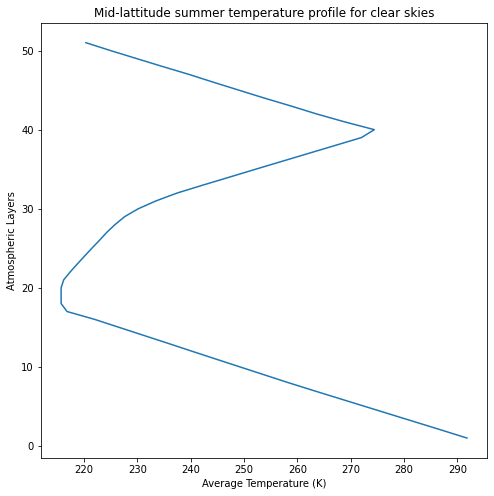

In [56]:
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(input_mls[2], output_51l[0])
ax.set_xlabel('Average Temperature (K)')
ax.set_ylabel('Atmospheric Layers')
ax.set_title('Mid-lattitude summer temperature profile for clear skies')

Text(0.5, 1.0, 'Mid-lattitude summer atmospheric pressure profile for clear skies')

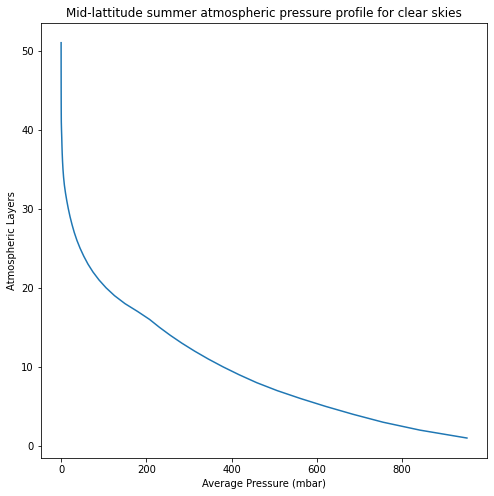

In [57]:
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(input_mls[3], output_51l[0])
ax.set_xlabel('Average Pressure (mbar)')
ax.set_ylabel('Atmospheric Layers')
ax.set_title('Mid-lattitude summer atmospheric pressure profile for clear skies')

Text(0.5, 1.0, 'Mid-lattitude summer atmospheric pressure vs temperature profile for clear skies')

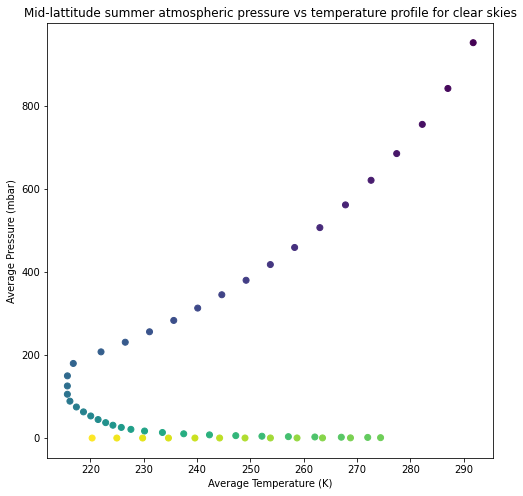

In [95]:
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(input_mls[2], input_mls[3], c=output_51l[0], cmap='viridis')
ax.set_ylabel('Average Pressure (mbar)')
ax.set_xlabel('Average Temperature (K)')
ax.set_title('Mid-lattitude summer atmospheric pressure vs temperature profile for clear skies')
# Colormap is set as following: Darker colors correspond to lower altitudes and lighter for higher ones

The following plots are for heating rate and net upward flux as output of rrtmg given the above input conditions.

Text(0.5, 1.0, 'Mid-lattitude summer heating rate for clear skies for waveband 980.0 - 1080.0 cm^(-1)')

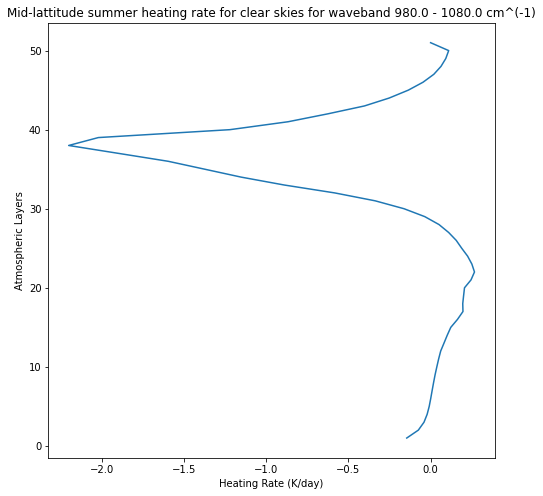

In [93]:
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(output_51l[3], output_51l[0])
ax.set_xlabel('Heating Rate (K/day)')
ax.set_ylabel('Atmospheric Layers')
ax.set_title('Mid-lattitude summer heating rate for clear skies for waveband {} cm^(-1)'.format(output_51l[4]))

Text(0.5, 1.0, 'Mid-lattitude summer net upward radiative flux for clear skies for waveband 980.0 - 1080.0 cm^(-1)')

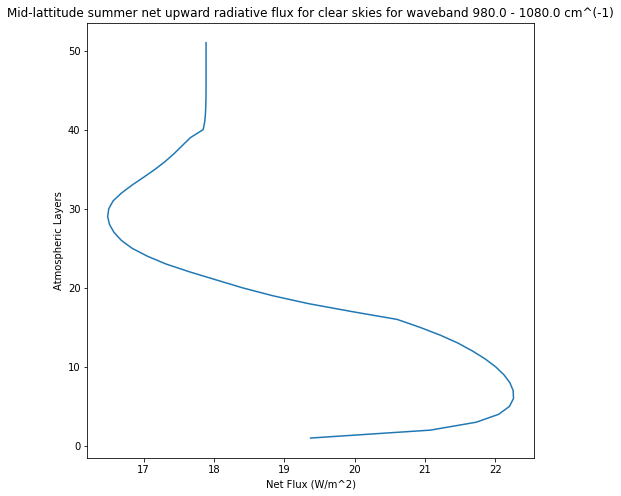

In [94]:
fig, ax = plt.subplots(figsize=(8,8))
ax.plot(output_51l[2], output_51l[0])
ax.set_xlabel('Net Flux (W/m^2)')
ax.set_ylabel('Atmospheric Layers')
ax.set_title('Mid-lattitude summer net upward radiative flux for clear skies for waveband {} cm^(-1)'.format(output_51l[4]))